# Part II - Communicate Data Findings: Prosper Loan Dataset
## by Ridwan Omotosho


## Investigation Overview


> In this investigation, I want to check the relationship between Borrower's rate and other variables in the datasets. The main focus would be on but not limited to Loan original amount, borrower's monthly income, employment status and Loan term. 

## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. After the necessary data wrangling processes, part of the dataset having 109,535 rows and 17 columns was explored. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Loading the dataset into a panda dataframe
loan_data = pd.read_csv('prosperLoanData.csv')
loan_data['year'] = pd.DatetimeIndex(loan_data['ListingCreationDate']).year
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,year
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,2007
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,2014
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,2007
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,2012
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,2013


In [3]:
loan_data.shape

(113937, 82)

## Distribution of key variables
>  We observe that the borrower APR often fluctuates between 15 and 20 percent, with a small increase to 35 percent,the largest original loan amount is from 3k to 5k. Additionally, I see an uptick between 10K and 20K.Lender Yield is observed to be normally distributed, with the majority of values falling between 0.1 and 0.2, with an increase at 0.3.As anticipated from the preceding one, the number of investors (for data with number of investors greater than 1) is fairly regularly distributed around 100.

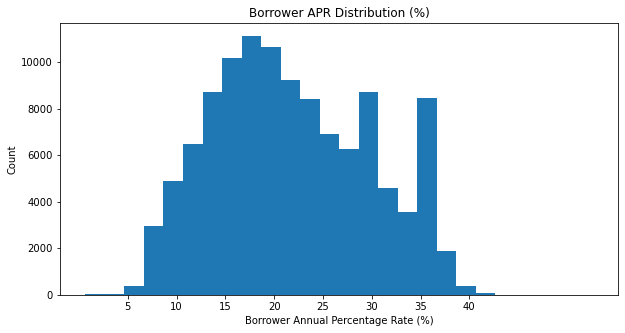

In [4]:
# Distribution of Borrower APR in percentage 
binsize = 2
borrowe_APR_percentage =loan_data ['BorrowerAPR']*100
bins = np.arange(loan_data ['BorrowerAPR'].min()*100, loan_data ['BorrowerAPR'].max()*100+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(x = borrowe_APR_percentage, bins = bins)
plt.title('Borrower APR Distribution (%)')
plt.xlabel('Borrower Annual Percentage Rate (%)')
plt.ylabel('Count')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40], ['5','10', '15', '20', '25', '30', '35', '40'])
plt.show()

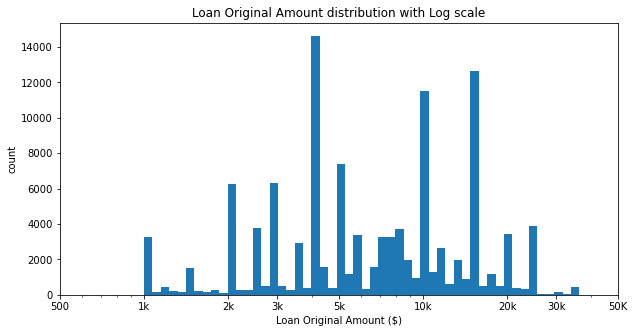

In [5]:
# Putting Loan Original Amount in a log-scale
log_binsize = 0.030
bins = 10 ** np.arange(3, np.log10(loan_data['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = loan_data, x = 'LoanOriginalAmount', bins = bins)
plt.title('Loan Original Amount distribution with Log scale')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3,3e3, 5e3, 1e4, 2e4, 3e4, 5e4], ['500', '1k', '2k', '3k', '5k', '10k', '20k', '30k', '50K'])
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('count')
plt.show()

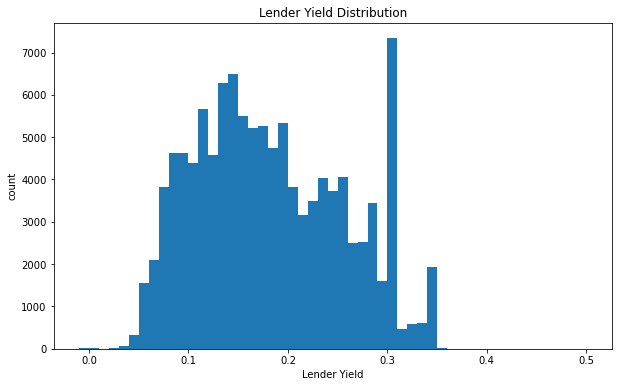

In [6]:
#Lender Yield Distribution
binsize = 0.01
bins = np.arange(loan_data['LenderYield'].min(), loan_data['LenderYield'].max()+binsize, binsize)

plt.figure(figsize=[10, 6])
plt.hist(data = loan_data, x = 'LenderYield', bins = bins)
plt.xlabel('Lender Yield')
plt.title('Lender Yield Distribution')
plt.ylabel('count')
plt.show()

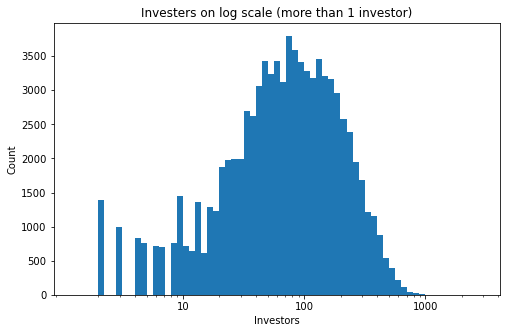

In [7]:
#We can plot the same for only loans with more than 1 investor
log_binsize = 0.05
bins = 10 ** np.arange(0.1, 3.5, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_data, x = 'Investors', bins = bins)
plt.title('Investers on log scale (more than 1 investor)')
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3], ['10', '100', '1000'])
plt.xlabel('Investors')
plt.ylabel('Count')
plt.show()

## Correlation between borrower's rate and other numerical variables

> It was actually surprising to see that BorrowerRate has a negative correlation with LoanOriginalAmount and weak correlation with Loan Term.

In [8]:
#Numeric Variables
numeric_variables = ['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ProsperScore', 
                     'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'LP_ServiceFees', 'Investors',
                    'AmountDelinquent','LoanCurrentDaysDelinquent']

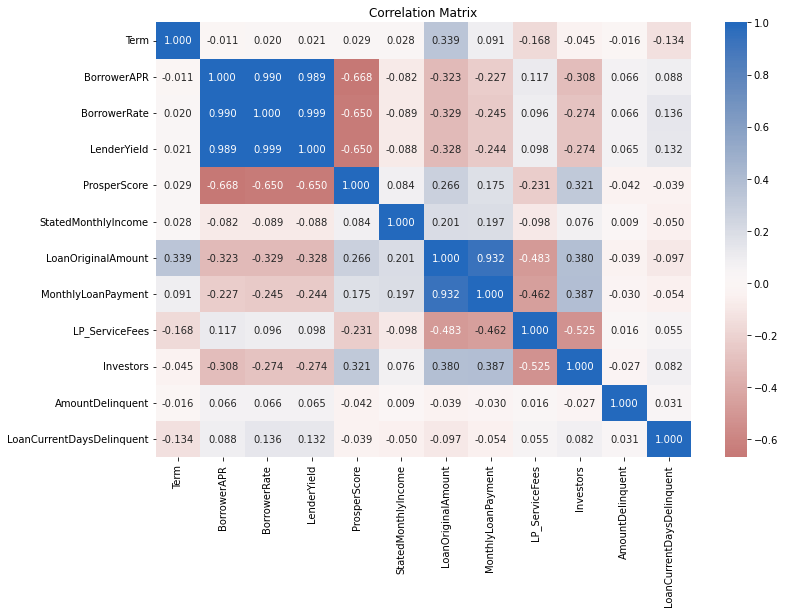

In [9]:
# Correlation matrix for all numeric variables
plt.figure(figsize = [12, 8])
sb.heatmap(loan_data[numeric_variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix') 
plt.show()

In [ ]:
!jupyter nbconvert Part_II_prosper_loan_slide_deck_1.ipynb --to slides --post serve --no-input --no-prompt